# 1
Escolha um conjunto de dados e realize uma análise exploratória de dados (EDA).

Lembre-se de:

- verificar os dados
- realizar a limpeza de dados nulos
- utilizar plots para entender os dados
- tentar tirar "pequenas conclusões" dos dados

Algumas fontes de conjunto de dados: 

- [UCI Repository](https://archive.ics.uci.edu/ml/index.php)
- [Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
- [Seaborn](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)
- [Kaggle](https://www.kaggle.com/datasets)

Alguns conjuntos de dados interessantes são:

- [Iris](https://www.kaggle.com/datasets/uciml/iris)
- [Titanic](https://www.kaggle.com/competitions/titanic/data?select=train.csv)
- [Palmer Penguins](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)
- [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)
- [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)
- [Drug Classification](https://www.kaggle.com/datasets/prathamtripathi/drug-classification)


In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('StudentsPerformance.csv') 
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [371]:
df.isnull().sum() #verfica se tem dados faltantes e os soma, caso haja.
#pelo saida, não há dados faltantes.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

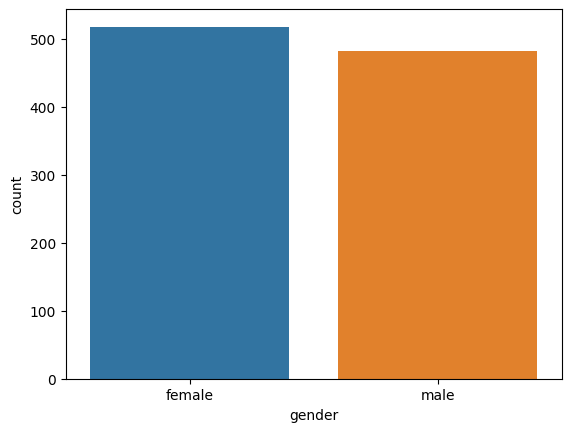

In [372]:
sns.countplot(x = df['gender']);

In [373]:
#df_parent_prepat = df[['parental level of education', 'test preparation course']]
#df_parent_prepat

In [374]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [375]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [376]:
df_course_completed = (df.loc[df['test preparation course'] == 'completed'])
df_course_none = (df.loc[df['test preparation course'] == 'none'])

In [377]:
stats = df_course_completed.describe()
stats.loc['mean']

math score       69.695531
reading score    73.893855
writing score    74.418994
Name: mean, dtype: float64

In [378]:
metrics_course_completed = df_course_completed
mm_c = metrics_course_completed['math score'].mean()
mr_c = metrics_course_completed['reading score'].mean()
mw_c= metrics_course_completed['writing score'].mean()

metrics_course_none = df_course_none
mm_n = metrics_course_completed['math score'].mean()
mr_n = metrics_course_completed['reading score'].mean()
mw_n = metrics_course_completed['writing score'].mean()

names_c = ['mm_c', 'mr_c', 'mw_c']
values_c = [mm_c, mr_c, mw_c]

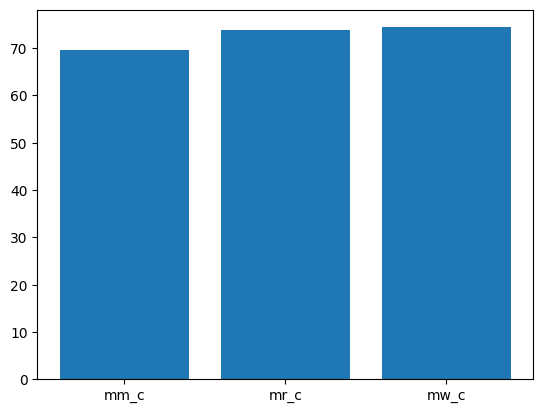

In [379]:
plt.bar(names_c, values_c);

In [380]:
stats1 = df_course_none.describe()
stats.loc['mean']

math score       69.695531
reading score    73.893855
writing score    74.418994
Name: mean, dtype: float64

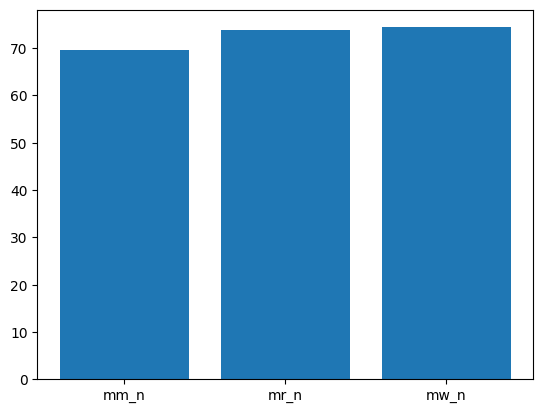

In [381]:
#para course none
names_n = ['mm_n', 'mr_n', 'mw_n']
values_n = [mm_n, mr_n, mw_n]

plt.bar(names_n, values_n);

Pela analise dos dados das colunas metricas de avaliação e curso preparatorio, usando média, concluo que o curso preparatorio não tem impacto sobre as notas obtidas nos testes. Além de que comparando metricas de retorno da função describe comfirmamos.

In [382]:
df['race/ethnicity'].replace({'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5});

In [402]:
df_mean = df.drop(['gender', 'parental level of education', 'lunch', 'test preparation course'],axis=1)
df_mean.T.values

array([['group B', 'group C', 'group B', ..., 'group C', 'group D',
        'group D'],
       [72, 69, 90, ..., 59, 68, 77],
       [72, 90, 95, ..., 71, 78, 86],
       [74, 88, 93, ..., 65, 77, 86]], dtype=object)

In [410]:
names_col = ['mean_math_score','mean_reading_score','mean_writing_score']
index = ['G_A', 'G_B', 'G_C', 'G_D', 'G_E']

array_T = df_mean.drop('race/ethnicity',axis=1).T.values
array_T

for i, h in zip(df_mean['race/ethnicity'].unique(),array_T): #zip iterações entre colunas
    print(i)

group B
group C
group A


In [ ]:
group_1 = (df.loc[df['race/ethnicity'] == 'group A'])
media_math_group1 = group_1['math score'].mean()
media_reading_group1 = group_1['reading score'].mean()
group_1['writing score'].mean()

group_2 = (df.loc[df['race/ethnicity'] == 'group B'])
group_2['math score'].mean()
group_2['reading score'].mean()
group_2['writing score'].mean()

group_3 = (df.loc[df['race/ethnicity'] == 'group C'])
group_3['math score'].mean()
group_3['reading score'].mean()
group_3['writing score'].mean()

group_4 = (df.loc[df['race/ethnicity'] == 'group D'])
group_4['math score'].mean()
group_4['reading score'].mean()
group_4['writing score'].mean()

group_5 = (df.loc[df['race/ethnicity'] == 'group E'])
group_5['math score'].mean()
group_5['reading score'].mean()
group_5['writing score'].mean()

71.40714285714286